##### Copyright 2022 The TensorFlow Authors.

Licensed under the Apache License, Version 2.0 (the "License");

# Image aesthetic scoring with MUSIQ models

In this colab, you can try any of the 4 [MUSIQ](https://ai.googleblog.com/2022/10/musiq-assessing-image-aesthetic-and.html) models to score the aesthetic of an image.

These models have a specific characteristic that it can handle images in any size or aspect ratio, making it not necessary to do any preprocessing on the image


In [1]:
import tensorflow as tf
import tensorflow_hub as hub

import requests
from PIL import Image
from io import BytesIO

import matplotlib.pyplot as plt
import numpy as np

# Load Model

In [2]:
selected_model = 'ava' #@param ['spaq', 'koniq', 'paq2piq', 'ava']

NAME_TO_HANDLE = {
    # Model trained on SPAQ dataset: https://github.com/h4nwei/SPAQ
    'spaq': 'https://tfhub.dev/google/musiq/spaq/1',

    # Model trained on KonIQ-10K dataset: http://database.mmsp-kn.de/koniq-10k-database.html
    'koniq': 'https://tfhub.dev/google/musiq/koniq-10k/1',

    # Model trained on PaQ2PiQ dataset: https://github.com/baidut/PaQ-2-PiQ
    'paq2piq': 'https://tfhub.dev/google/musiq/paq2piq/1',

    # Model trained on AVA dataset: https://ieeexplore.ieee.org/document/6247954
    'ava': 'https://tfhub.dev/google/musiq/ava/1',
}

model_handle = NAME_TO_HANDLE[selected_model]
model = hub.load(model_handle)
predict_fn = model.signatures['serving_default']

print(f'loaded model {selected_model} ({model_handle})')

loaded model paq2piq (https://tfhub.dev/google/musiq/paq2piq/1)


# Util functions

Functions to download an image and to show it.

In [3]:
def load_image_from_url(img_url):
  """Returns an image with shape [1, height, width, num_channels]."""
  user_agent = {'User-agent': 'Colab Sample (https://tensorflow.org)'}
  response = requests.get(img_url, headers=user_agent)
  image_bytes = BytesIO(response.content)
  image = Image.open(image_bytes)
  return image, response.content

def show_image(image, title=''):
  image_size = image.size
  plt.imshow(image)
  plt.axis('on')
  plt.title(title)
  plt.show()

# Load an image

The prediction will run directly on the bytes loaded, no preprocessing is needed

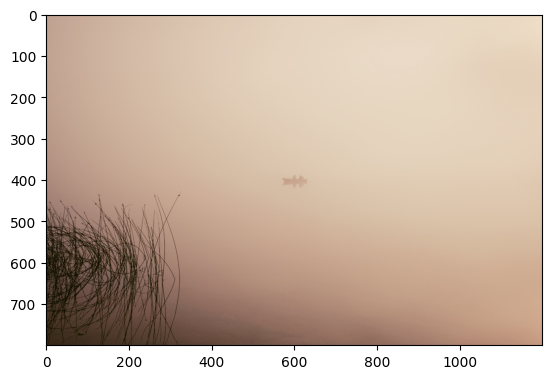

In [4]:
image_url = 'https://images.dpchallenge.com/images_challenge/3000-3999/3361/1200/Copyrighted_Image_Reuse_Prohibited_1268627.jpg' #@param {type: 'string'}

image, image_bytes = load_image_from_url(image_url)

show_image(image)

# Run Prediction on a Single Image

In [5]:
prediction = predict_fn(tf.constant(image_bytes))
print("predicted MOS: ", prediction)

predicted MOS:  {'output_0': <tf.Tensor: shape=(), dtype=float32, numpy=68.68402862548828>}
